# Proyecto de Campaña de Marketing Bancario de Luisa

In [2]:
# Instalación de la librería ucimlrepo
!pip install ucimlrepo

# Importación de librerías necesarias
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Carga del dataset Bank Marketing desde el repositorio UCI (ID: 222)
bank_marketing = fetch_ucirepo(id=222)

# Separación de datos en características (X) y etiquetas (y)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Impresión de la metadata del dataset
print("Metadata del dataset:")
print(bank_marketing.metadata)

# Información sobre las variables incluidas
print("\nInformación de variables:")
print(bank_marketing.variables)


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Metadata del dataset:
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014,

In [ ]:
# Combinación de características y etiqueta en un solo DataFrame
df = pd.DataFrame(X)
df["y"] = y.values.ravel()  

# Visualización de las primeras filas del DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [4]:
# Información general del DataFrame
print("Información del DataFrame:")
df.info()

# Forma del DataFrame (número de filas y columnas)
print("\nDimensiones del DataFrame:")
print(df.shape)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Dimensiones del DataFrame:
(45211

El dataset está compuesto por 45,211 registros distribuidos en 17 columnas, donde la variable objetivo es y, que indica si una persona suscribirá un depósito a largo plazo. De las columnas totales, 7 son numéricas y 10 categóricas. La variable poutcome presenta un alto grado de incompletitud, con solo 8,252 registros no nulos, por lo que se excluirá del análisis exploratorio de datos (EDA). Por otro lado, aunque la variable contact tiene más de 13,000 valores faltantes, se evaluará su inclusión en el análisis debido a su posible relevancia. Las demás 15 variables contienen datos completos y están listas para ser analizadas.

In [5]:
# Eliminación de duplicados
df = df.drop_duplicates()

# Verificación de las nuevas dimensiones del DataFrame
print("Dimensiones después de eliminar duplicados:")
print(df.shape)

Dimensiones después de eliminar duplicados:
(45211, 17)


In [6]:
# Eliminación de columnas irrelevantes
columnas_a_eliminar = ["contact", "day_of_week", "poutcome"]

for col in columnas_a_eliminar:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Verificación de las primeras filas después de la eliminación
df.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,may,198,1,-1,0,no


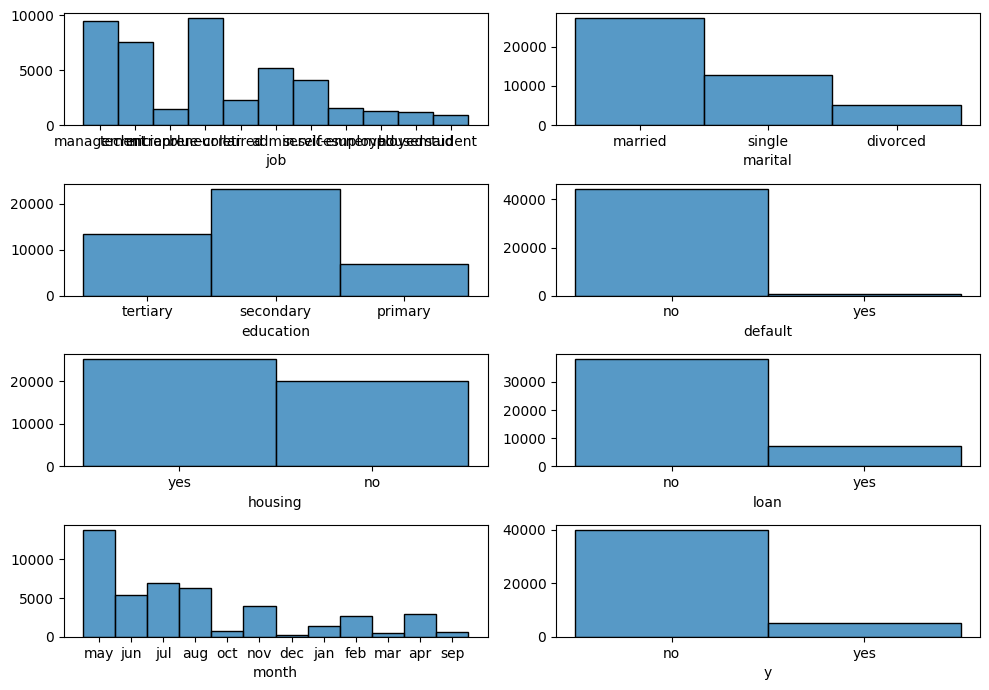

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear subgráficas
fig, axis = plt.subplots(4, 2, figsize=(10, 7))

# Crear histogramas múltiples
sns.histplot(ax=axis[0, 0], data=df, x="job").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=df, x="marital").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x="education").set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df, x="default").set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=df, x="housing").set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=df, x="loan").set(ylabel=None)
sns.histplot(ax=axis[3, 0], data=df, x="month").set(ylabel=None)
sns.histplot(ax=axis[3, 1], data=df, x="y").set(ylabel=None)

# Ajustar y mostrar el gráfico
plt.tight_layout()
plt.show()


Las gráficas muestran la distribución de diversas variables categóricas en un conjunto de datos bancarios. La mayoría de los clientes están empleados en trabajos administrativos, técnicos o de servicios, mientras que los estudiantes y desempleados son minoría. La mayoría son casados, con educación secundaria, y no presentan historial de incumplimiento de crédito. Predomina la tenencia de vivienda y préstamos, aunque una parte significativa no los posee. En cuanto a los meses de contacto, mayo concentra la mayor cantidad, seguido por junio y julio. Finalmente, la variable objetivo 'y', que indica si el cliente aceptó una oferta (probablemente de un producto bancario), muestra una marcada desproporción, con una mayoría de respuestas negativas. 

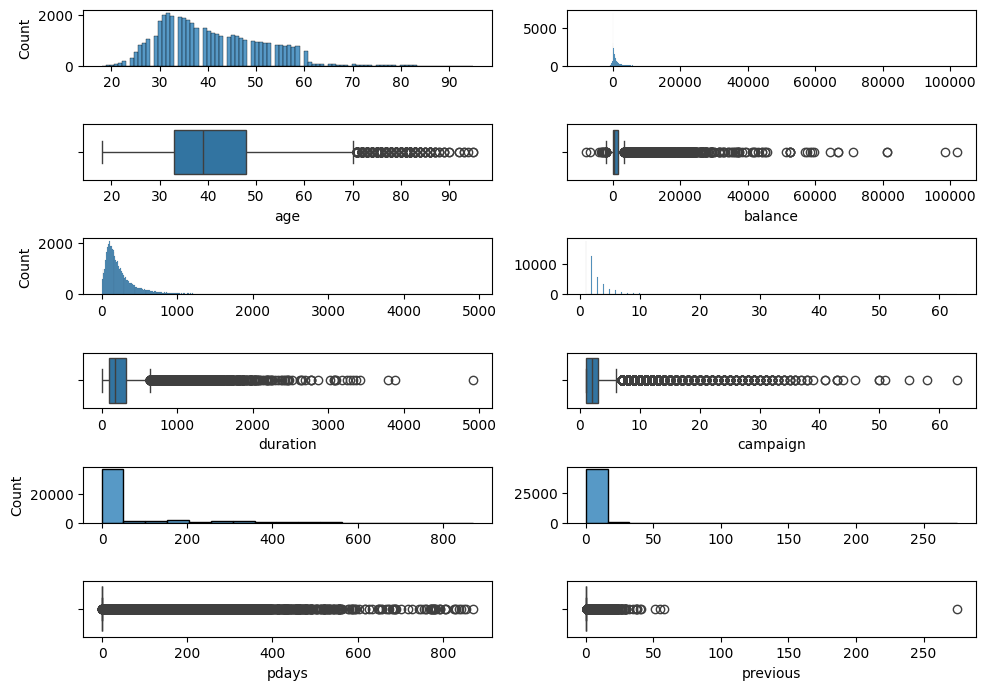

In [ ]:
# Crear subgráficas
fig, axis = plt.subplots(6, 2, figsize=(10, 7))

# Crear histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=df, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="age")
sns.histplot(ax=axis[0, 1], data=df, x="balance").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="balance")
sns.histplot(ax=axis[2, 0], data=df, x="duration").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="duration")
sns.histplot(ax=axis[2, 1], data=df, x="campaign").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x="campaign")
sns.histplot(ax=axis[4, 0], data=df, x="pdays").set(xlabel=None)
sns.boxplot(ax=axis[5, 0], data=df, x="pdays")
sns.histplot(ax=axis[4, 1], data=df, x="previous").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[5, 1], data=df, x="previous")

plt.tight_layout()

plt.show()


Las gráficas muestran la distribución de variables numéricas del conjunto de datos bancarios, destacando la presencia de valores atípicos en casi todas ellas. La edad se concentra entre los 30 y 40 años, con algunos valores extremos. El balance en cuenta presenta una fuerte asimetría hacia la derecha, con muchos clientes con saldos bajos y pocos con saldos muy altos. La duración de las llamadas (variable altamente correlacionada con el éxito de la campaña) también tiene una distribución sesgada, con la mayoría de las llamadas siendo cortas y algunos casos extremos. Las variables campaign (número de contactos en la campaña actual), pdays (días desde el último contacto), y previous (número de contactos previos) muestran que la mayoría de los clientes fueron contactados pocas veces, y en muchos casos nunca antes, aunque existen valores atípicos que indican contactos muy frecuentes. En conjunto, estas variables reflejan una distribución desigual y una alta variabilidad entre los clientes. 

In [9]:
# Factorización de la variable 'y'
df["y"] = pd.factorize(df["y"])[0]

df["y"].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

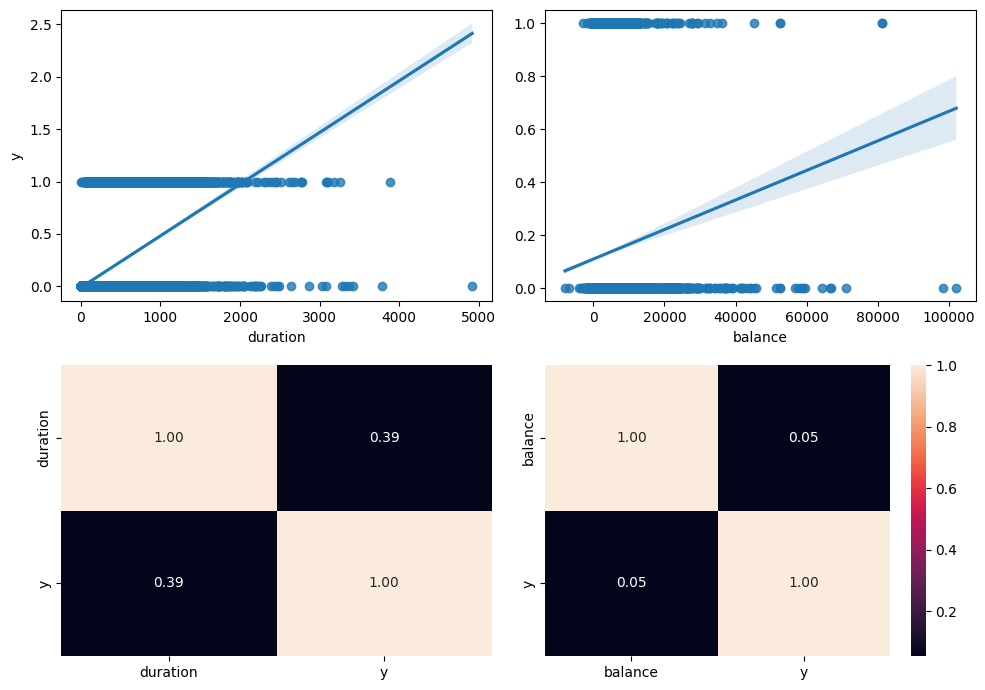

In [ ]:
# Crear subgráficas
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Crear diagramas de dispersión y mapas de calor de correlación
sns.regplot(ax=axis[0, 0], data=df, x="duration", y="y")
sns.heatmap(df[["duration", "y"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x="balance", y="y").set(ylabel=None)
sns.heatmap(df[["balance", "y"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

plt.show()


Las gráficas muestran la relación entre las variables numéricas duration (duración de la llamada) y balance (saldo en cuenta) con la variable objetivo y (respuesta del cliente). La duración muestra una correlación moderada y positiva con y (coeficiente de 0.39), lo que indica que las llamadas más largas están asociadas con una mayor probabilidad de éxito en la campaña. En contraste, el saldo en cuenta tiene una correlación muy baja (0.05) con la respuesta, sugiriendo que el balance financiero del cliente tiene poca influencia directa en la decisión de aceptar la oferta. Esto resalta que la duración de la interacción telefónica es un predictor más relevante que el estado financiero en este contexto.

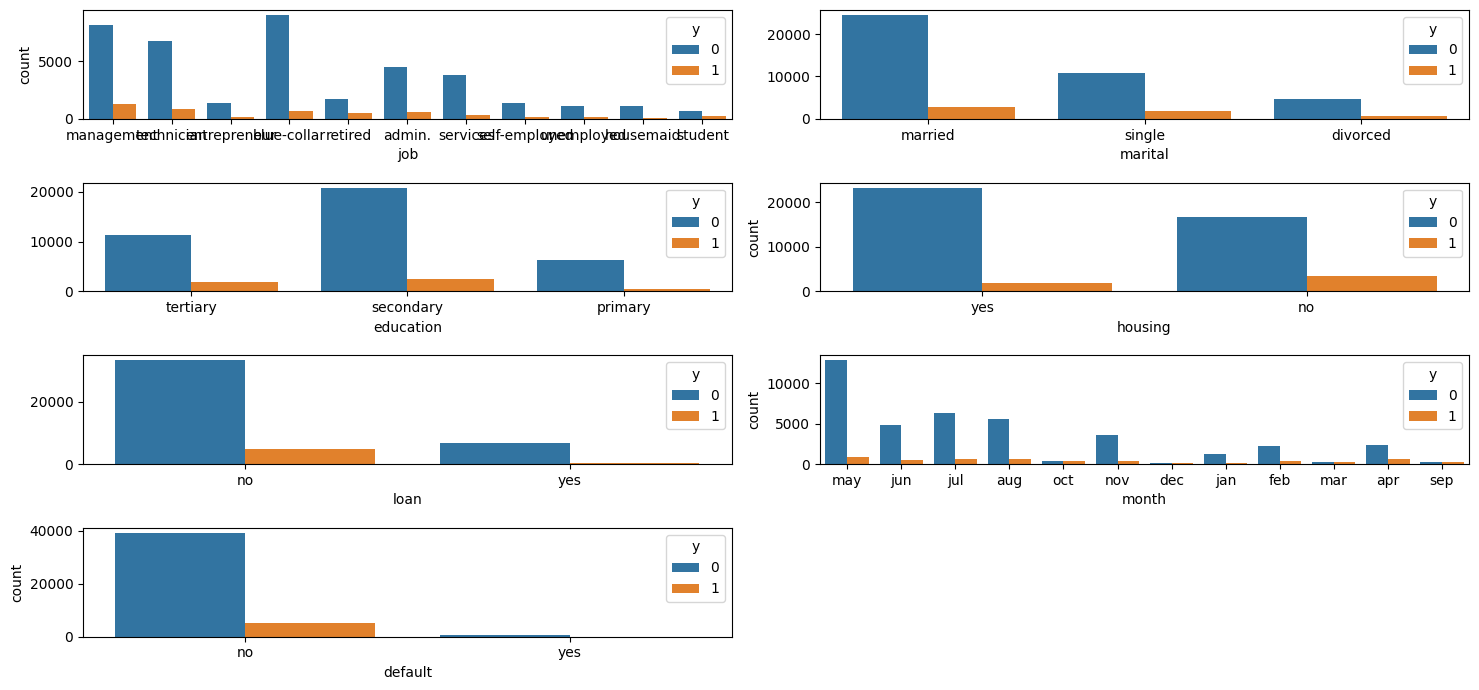

In [12]:
# Crear subgráficas
fig, axis = plt.subplots(4, 2, figsize=(15, 7))

# Crear countplots para las variables categóricas
sns.countplot(ax=axis[0, 0], data=df, x="job", hue="y")
sns.countplot(ax=axis[0, 1], data=df, x="marital", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=df, x="education", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 1], data=df, x="housing", hue="y")
sns.countplot(ax=axis[2, 0], data=df, x="loan", hue="y").set(ylabel=None)
sns.countplot(ax=axis[2, 1], data=df, x="month", hue="y")
sns.countplot(ax=axis[3, 0], data=df, x="default", hue="y")

# Ajustar el layout
plt.tight_layout()

# Eliminar el último gráfico vacío
fig.delaxes(axis[3, 1])


plt.show()


Las gráficas muestran la relación entre variables categóricas y la variable objetivo y (0: no aceptó, 1: sí aceptó) en una campaña bancaria. Se observa que, aunque la mayoría de los clientes no aceptan la oferta (barra azul), hay patrones interesantes entre los que sí lo hacen (barra naranja). Los clientes con trabajos en administración, técnicos o jubilados tienden a tener una mayor proporción de respuestas positivas que los de oficios manuales. Los solteros y aquellos con educación terciaria presentan una tasa de aceptación ligeramente más alta. Asimismo, quienes no tienen préstamos o créditos de vivienda, y no tienen historial de impago, tienden a aceptar más. Por último, los meses con mayor proporción de respuestas positivas son marzo, abril y septiembre, a diferencia de mayo, donde se concentran muchos contactos pero con baja aceptación. Esto sugiere que factores como la situación laboral, nivel educativo, y el momento del contacto influyen en el éxito de la campaña. 

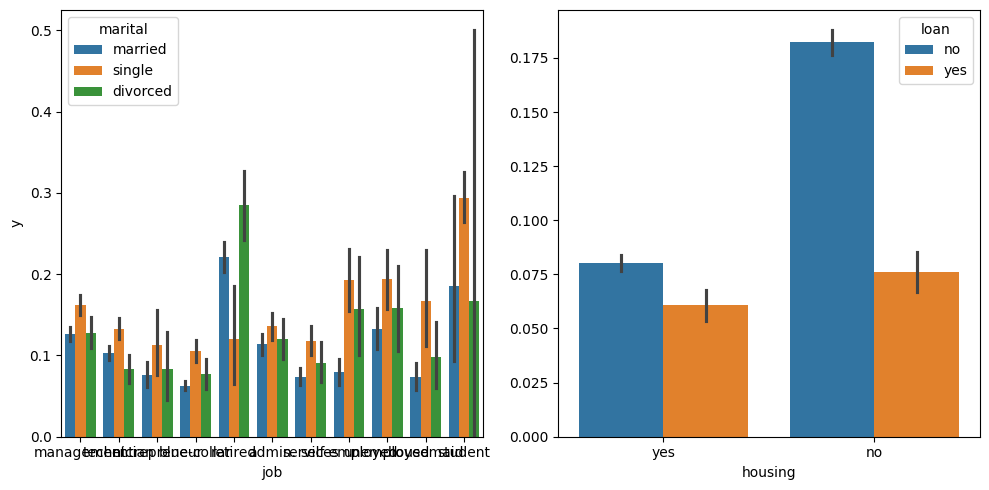

In [14]:
# Crear una figura con 2 columnas
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

# Crear los gráficos de barras para las variables "job" y "housing" con los hue correspondientes
sns.barplot(ax=axis[0], data=df, x="job", y="y", hue="marital")
sns.barplot(ax=axis[1], data=df, x="housing", y="y", hue="loan").set(ylabel=None)

plt.tight_layout()

plt.show()


Las gráficas muestran cómo varía la tasa de aceptación de la campaña (y) según el tipo de trabajo y estado civil (izquierda), y según la tenencia de préstamo y crédito hipotecario (derecha). En el gráfico de la izquierda, los estudiantes y jubilados, especialmente solteros, tienen las tasas más altas de aceptación, superando el 40% en algunos casos, mientras que los trabajadores manuales o de servicios tienen tasas más bajas sin importar el estado civil. Esto sugiere que el perfil sociodemográfico influye significativamente en la respuesta del cliente. En el gráfico de la derecha, se observa que los clientes sin préstamos ni hipotecas tienden a aceptar más las ofertas, indicando que una menor carga financiera puede estar asociada a una mayor receptividad.

In [15]:
# Conversión de variables categóricas a variables numéricas
df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["month"] = pd.factorize(df["month"])[0]
df["default"] = pd.factorize(df["default"])[0]


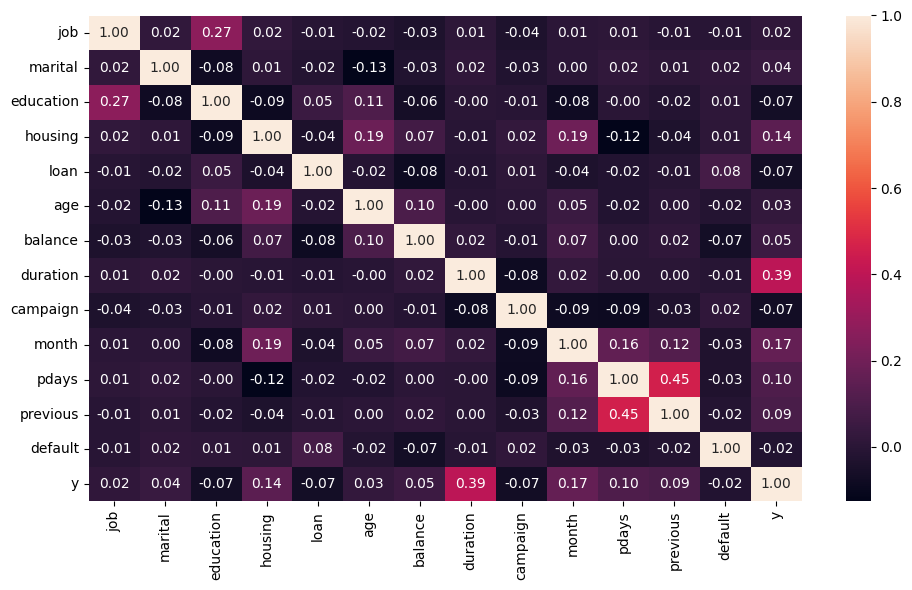

In [16]:
# Mapa de calor de las correlaciones entre las variables
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["job", "marital", "education", "housing", "loan", "age", "balance", "duration", "campaign", "month", "pdays", "previous", "default", "y"]].corr(), annot = True, fmt = ".2f")


plt.tight_layout()

plt.show()


La matriz de correlación muestra que la variable con mayor asociación positiva con la respuesta del cliente (y) es la duración de la llamada (duration), con un coeficiente de 0.39, lo que indica que a mayor duración, mayor probabilidad de aceptación de la oferta. También hay una correlación positiva moderada entre y y variables como housing (0.14), month (0.17) y pdays (0.10), aunque en menor medida. Por otro lado, variables como education, campaign, default y loan presentan correlaciones negativas débiles con y, lo que sugiere una leve influencia negativa. En general, la mayoría de las variables tienen correlaciones bajas entre sí, indicando escasa multicolinealidad, y la duración destaca claramente como el factor más relevante para predecir el éxito de la campaña. 

In [17]:
# Eliminación de columnas específicas
try:
    df.drop(["job", "marital", "age", "default"], axis = 1, inplace = True)
    df.head()
except:
    print("already deleted")


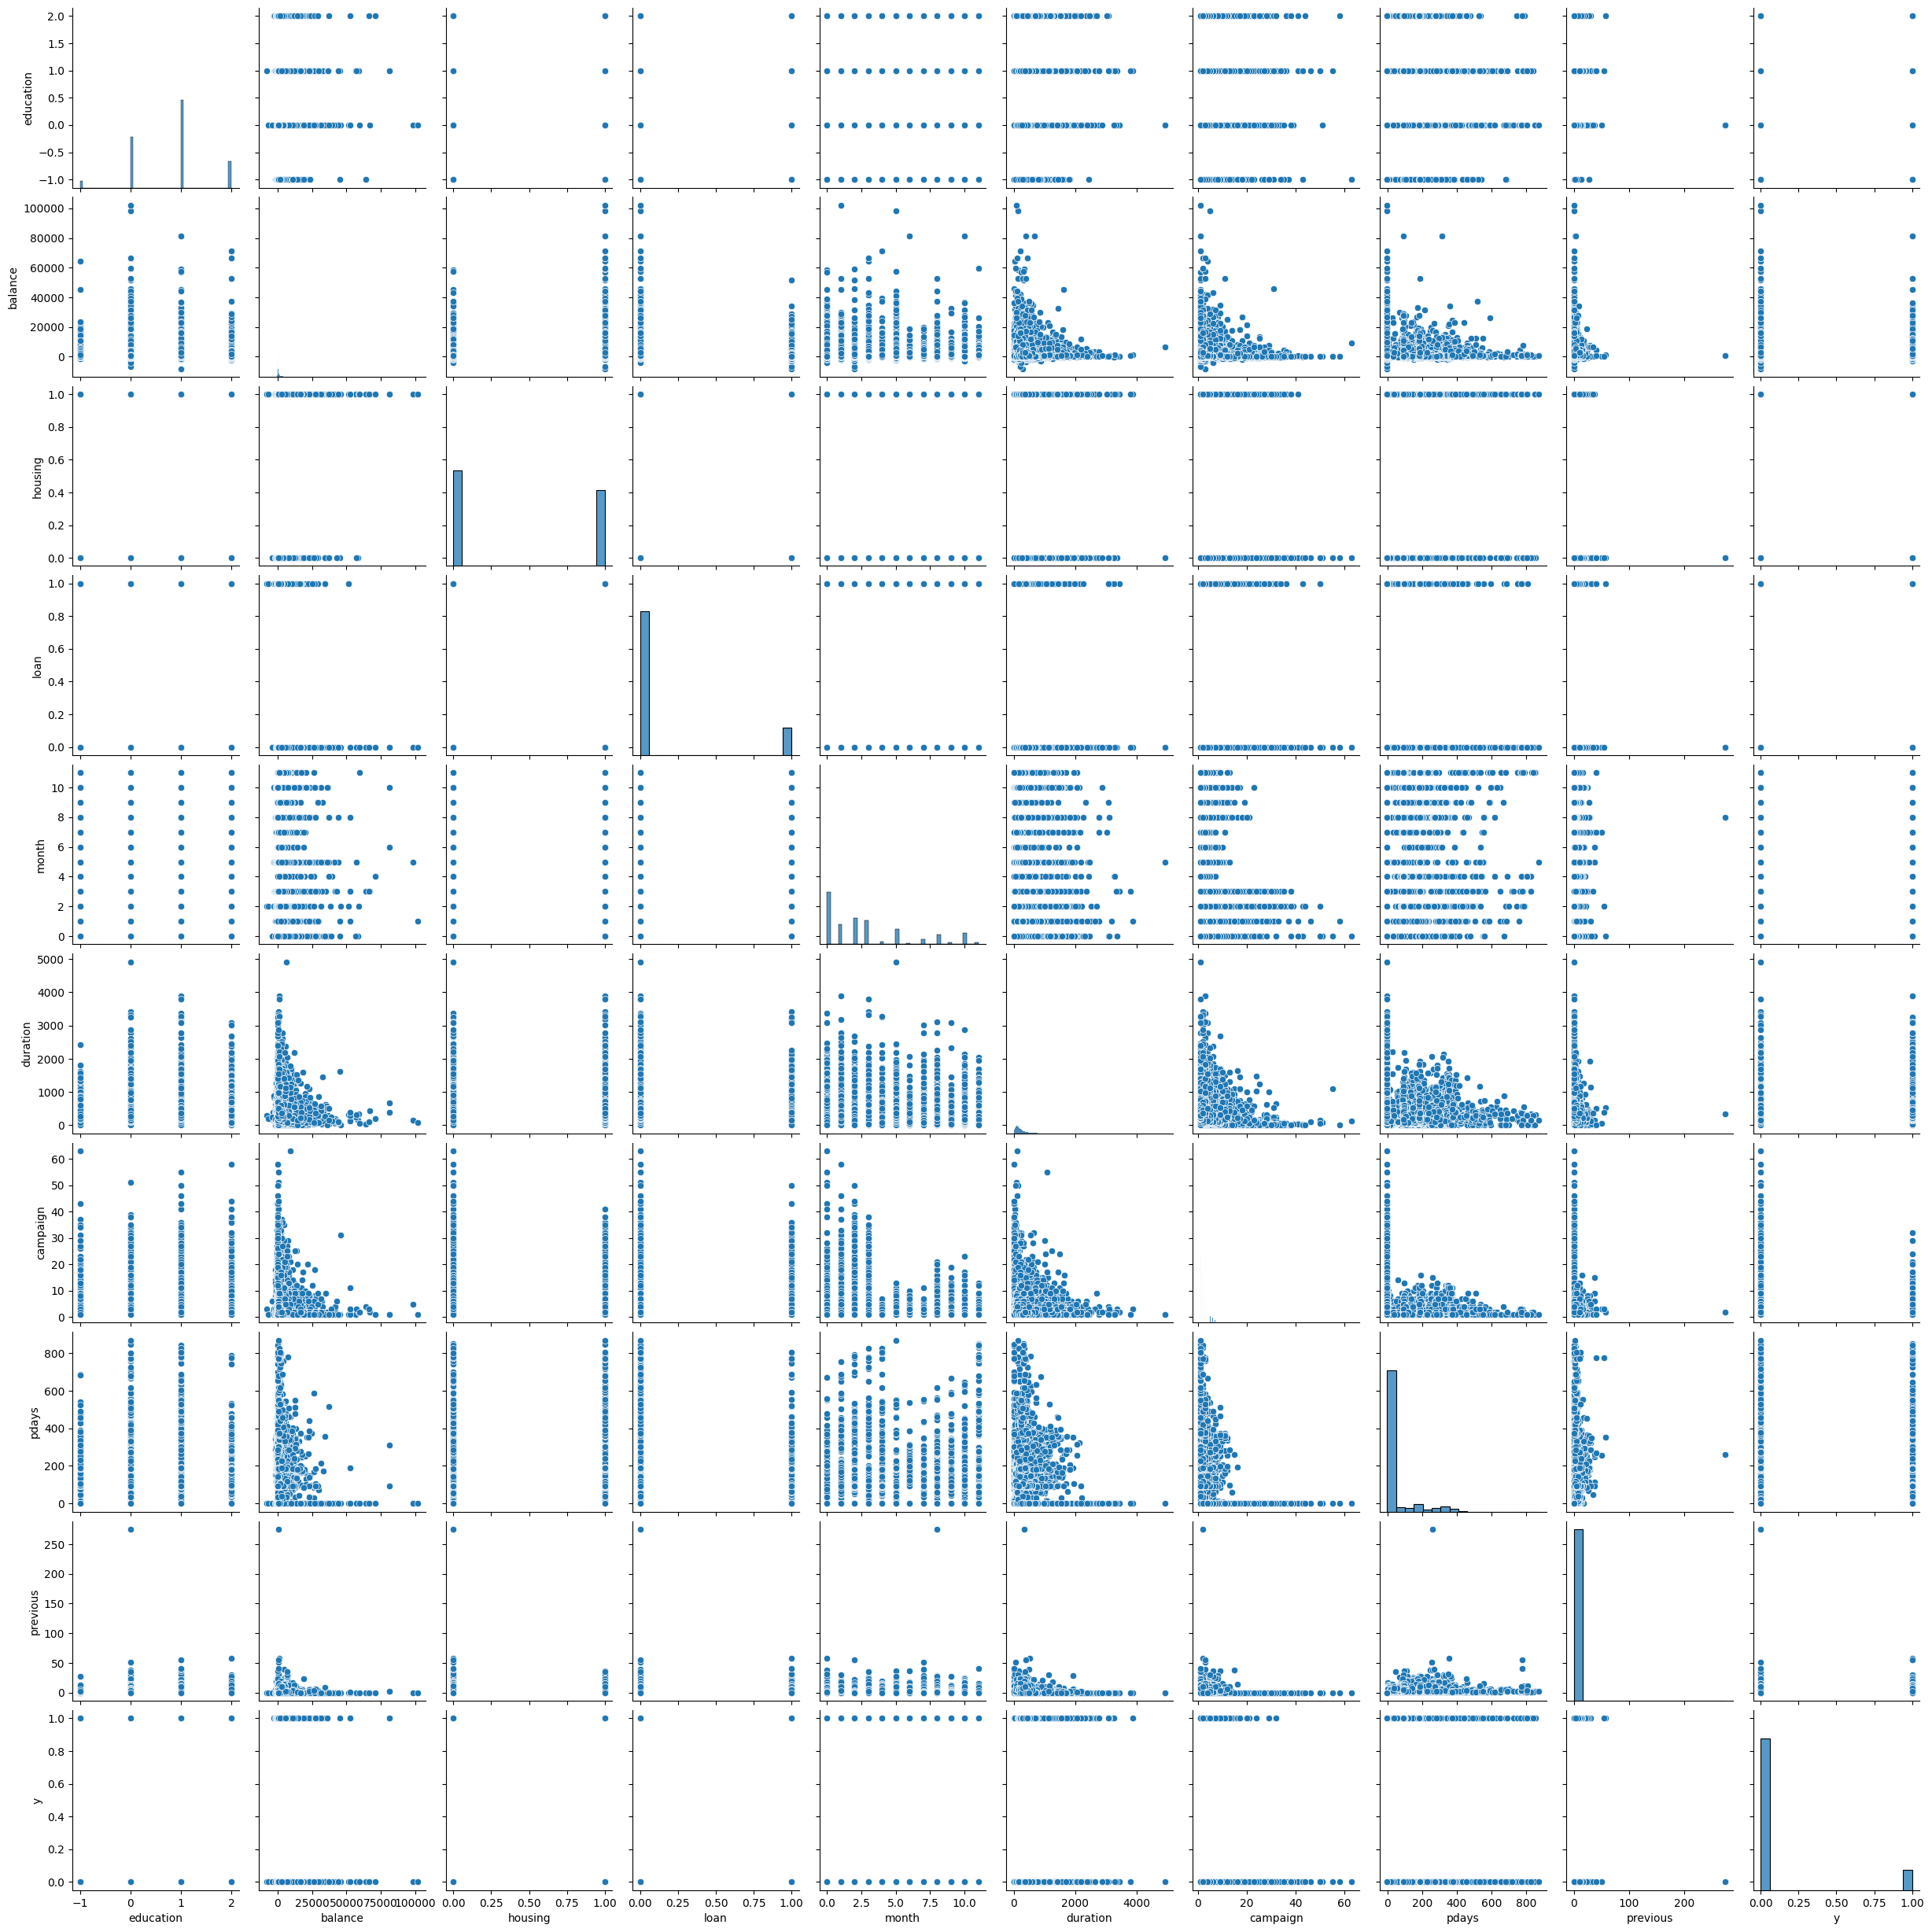

In [18]:
# Crear un par de gráficos para explorar relaciones entre las variables
sns.pairplot(data = df)


Se observa relaciones bivariadas y distribuciones individuales de múltiples variables del conjunto de datos. En esta visualización, destaca la fuerte relación positiva entre duration y la variable objetivo y, donde los valores altos de duración tienden a asociarse con respuestas positivas. Además, se observan algunas relaciones no lineales o concentraciones densas en valores bajos entre duration, pdays, previous y otras variables como campaign, lo que sugiere posibles interacciones o efectos acumulativos. Las variables categóricas codificadas (como education, month, housing) aparecen con patrones de dispersión más segmentados, reflejando su naturaleza discreta. 

In [19]:
# Obtener estadísticas descriptivas del DataFrame
df.describe()

,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.775187,1362.272058,0.444162,0.160226,2.940722,258.163080,2.763841,40.197828,0.580323,0.116985
std,0.747997,3044.765829,0.496878,0.366820,3.179741,257.527812,3.098021,100.128746,2.303441,0.321406
min,-1.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,0.000000,72.000000,0.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,1.000000,448.000000,0.000000,0.000000,2.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,1.000000,1428.000000,1.000000,0.000000,5.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,2.000000,102127.000000,1.000000,1.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


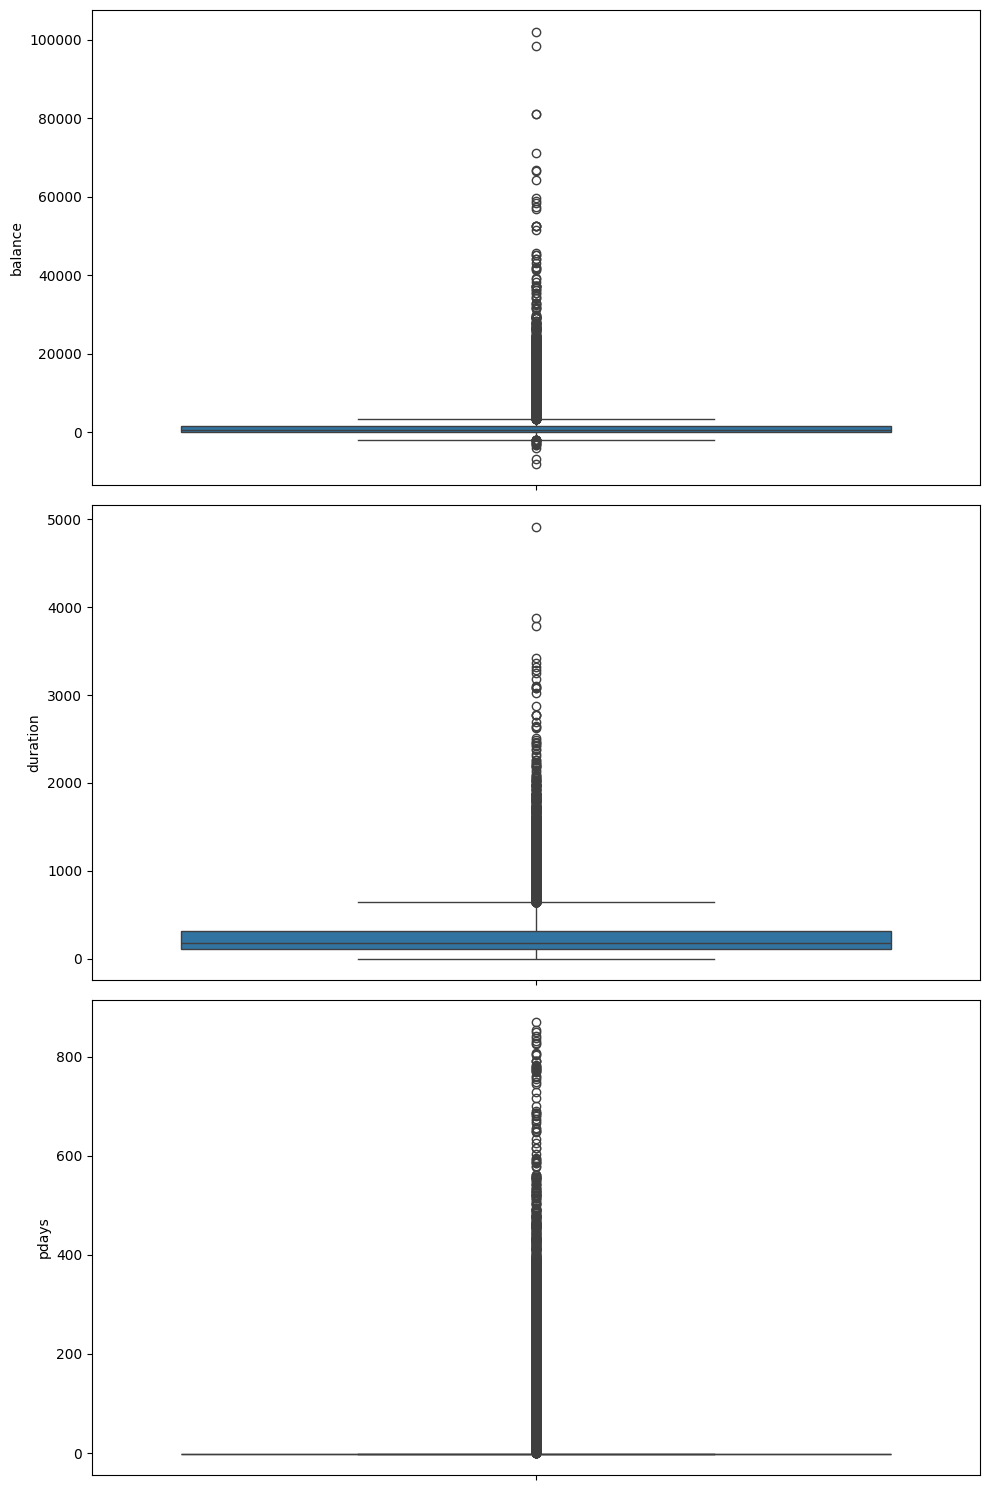

In [20]:
# Crear un gráfico de cajas para analizar la distribución de las variables
fig, axis = plt.subplots(3, figsize = (10, 15))

sns.boxplot(ax = axis[0], data = df, y = "balance")
sns.boxplot(ax = axis[1], data = df, y = "duration")
sns.boxplot(ax = axis[2], data = df, y = "pdays")

plt.tight_layout()

plt.show()


Revelan la presencia de una gran cantidad de valores atípicos (outliers) en cada una de ellas. En el caso de balance, aunque la mayoría de los datos se concentran cerca de cero, existen valores extremos que superan los 100,000, lo que sugiere una distribución altamente sesgada. Para duration, la mayoría de los contactos duran menos de 500 segundos, pero también hay numerosos registros significativamente más largos, incluso cercanos a los 5,000 segundos. Por último, pdays muestra que la mayoría de los valores están en cero (indicando ningún contacto previo), mientras que una menor proporción presenta valores mucho más altos, lo que también indica una distribución sesgada con outliers importantes. 

In [21]:
# Obtener estadísticas descriptivas para la variable balance
balance_stats = df["balance"].describe()
balance_stats

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [22]:
# Cálculo de los límites superiores e inferiores para identificar outliers
balance_iqr = df["balance"].describe()["75%"] - df["balance"].describe()["25%"]
upper_limit = df["balance"].describe()["75%"] + 1.5 * balance_iqr
lower_limit = df["balance"].describe()["25%"] - 1.5 * balance_iqr

# Imprimir los límites y el rango intercuartil
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(balance_iqr, 2)}")

The upper and lower limits for finding outliers are 3462.0 and -1962.0, with an interquartile range of 1356.0


In [23]:
# Filtrar registros con balance superior a 3462
df_filtered = df[df["balance"] > 3462]
df_filtered

,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
34,0,10635,0,0,0,336,1,-1,0,0
65,0,6530,0,0,0,91,1,-1,0,0
69,1,12223,0,1,0,177,1,-1,0,0
70,1,5935,0,1,0,258,1,-1,0,0
186,-1,4384,0,0,0,315,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45164,0,4655,1,0,5,111,2,-1,0,0
45181,1,6879,1,0,5,74,2,118,3,0
45185,0,4256,0,0,5,200,1,92,4,1
45191,0,3810,0,0,5,262,1,183,1,1


In [24]:
# Filtrar registros con balance inferior a -1962
df_filtered = df[df["balance"] < -1962]
df_filtered


,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
1896,0,-3313,0,1,0,153,1,-1,0,0
7413,0,-3372,0,0,0,386,2,-1,0,0
7756,0,-2049,0,0,0,169,3,-1,0,0
11655,0,-1968,1,0,1,60,3,-1,0,0
12909,1,-8019,1,1,2,299,3,-1,0,0
13687,1,-2093,0,1,2,120,3,-1,0,0
13708,1,-1965,1,1,2,317,2,-1,0,0
14434,0,-2282,0,1,2,301,6,-1,0,0
15682,0,-6847,1,1,2,206,1,-1,0,0
17159,1,-2082,1,1,2,123,6,-1,0,0


In [25]:
# Obtener las estadísticas descriptivas de la columna 'duration'
duration_stats = df["duration"].describe()
duration_stats

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [27]:
# Calcular el rango intercuartílico y los límites superior e inferior para detectar outliers en 'duration'
duration_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * duration_iqr
lower_limit = duration_stats["25%"] - 1.5 * duration_iqr

# Imprimir los límites y el IQR
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(duration_iqr, 2)}")


The upper and lower limits for finding outliers are 643.0 and -221.0, with an interquartile range of 216.0


In [28]:
# Filtrar los registros donde la duración es mayor que el límite superior para detectar outliers
df[df["duration"] > 643]


,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
37,1,-3,1,0,0,1666,1,-1,0,0
43,1,529,0,0,0,1492,1,-1,0,0
53,1,-76,0,0,0,787,1,-1,0,0
59,2,179,0,0,0,1778,1,-1,0,0
61,1,989,0,0,0,812,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45124,2,232,0,0,4,701,2,-1,0,1
45199,1,1475,0,0,5,1166,3,530,12,0
45200,1,557,0,0,5,1556,4,-1,0,1
45206,0,825,1,0,5,977,3,-1,0,1


In [29]:
# Filtrar los registros donde la duración es mayor que el límite inferior para detectar outliers
df[df["duration"] > -221]


,education,balance,housing,loan,month,duration,campaign,pdays,previous,y
0,0,2143,0,0,0,261,1,-1,0,0
1,1,29,0,0,0,151,1,-1,0,0
2,1,2,0,1,0,76,1,-1,0,0
3,-1,1506,0,0,0,92,1,-1,0,0
4,-1,1,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,0,825,1,0,5,977,3,-1,0,1
45207,2,1729,1,0,5,456,2,-1,0,1
45208,1,5715,1,0,5,1127,5,184,3,1
45209,1,668,1,0,5,508,4,-1,0,0


In [30]:
pdays_stats = df["pdays"].describe()
pdays_stats


count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [31]:
pdays_iqr = pdays_stats["75%"] - pdays_stats["25%"]
upper_limit = pdays_stats["75%"] + 1.5 * pdays_iqr
lower_limit = pdays_stats["25%"] - 1.5 * pdays_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(pdays_iqr, 2)}")


The upper and lower limits for finding outliers are -1.0 and -1.0, with an interquartile range of 0.0


In [ ]:
df[df["pdays"] < -1.0] #No requiere


,education,balance,housing,loan,month,duration,campaign,pdays,previous,y


In [33]:
df.isnull().sum().sort_values(ascending=False)


education    0
balance      0
housing      0
loan         0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

num_variables = ["education", "balance", "housing", "loan", "month", "duration", "campaign", "pdays", "previous"]

# Dividimos el dataset en muestras de entrenamiento y prueba
X = df.drop("y", axis=1)[num_variables]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,education,balance,housing,loan,month,duration,campaign,pdays,previous
3344,2,849,0,0,0,72,1,-1,0
17965,2,1415,0,0,2,269,2,-1,0
18299,1,3842,1,0,2,130,4,-1,0
10221,0,-119,0,0,1,375,11,-1,0
32192,2,3498,1,0,10,264,2,-1,0


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=num_variables)

X_train_norm.head()


,education,balance,housing,loan,month,duration,campaign,pdays,previous
3344,1.636573,-0.169381,-0.892343,-0.438594,-0.925708,-0.719756,-0.565886,-0.411364,-0.244772
17965,1.636573,0.017848,-0.892343,-0.438594,-0.296366,0.047138,-0.245389,-0.411364,-0.244772
18299,0.297306,0.820681,1.120646,-0.438594,-0.296366,-0.493970,0.395606,-0.411364,-0.244772
10221,-1.041961,-0.489588,-0.892343,-0.438594,-0.611037,0.459781,2.639088,-0.411364,-0.244772
32192,1.636573,0.706889,1.120646,-0.438594,2.221002,0.027674,-0.245389,-0.411364,-0.244772


In [44]:
import os

# Verificar si el directorio existe, y si no, crearlo
output_dir = "/workspaces/LogisticRegression/data/processed"
os.makedirs(output_dir, exist_ok=True)

# Guardar los datos normalizados con las etiquetas en archivos CSV
X_train_norm_df.to_csv(f"{output_dir}/clean_bank_train.csv", index=False)
X_test_norm_df.to_csv(f"{output_dir}/clean_bank_test.csv", index=False)

print("Archivos CSV guardados con éxito.")


Archivos CSV guardados con éxito.



# REGRESIÓN LOGÍSTICA 

In [46]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos normalizados y las etiquetas
model.fit(X_train_norm, y_train)

print("Modelo entrenado con éxito.")


Modelo entrenado con éxito.


In [ ]:
# Realizar predicciones con el modelo entrenado usando los datos de prueba normalizados
y_pred = model.predict(X_test_norm)


y_pred


array([0, 0, 0, ..., 0, 0, 0], shape=(9043,))

In [ ]:
from sklearn.metrics import accuracy_score

# Calcular la precisión del modelo comparando las predicciones con las etiquetas reales
accuracy = accuracy_score(y_test, y_pred)


accuracy


0.8848833351763795

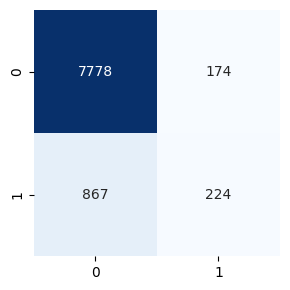

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Calcular la matriz de confusión
bank_cm = confusion_matrix(y_test, y_pred)

# Crear un DataFrame de la matriz de confusión para una visualización más fácil
cm_df = pd.DataFrame(bank_cm)

# Configurar el tamaño de la figura
plt.figure(figsize=(3, 3))

# Dibujar el heatmap de la matriz de confusión
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False, cmap="Blues")

# Ajustar el layout para que todo encaje bien
plt.tight_layout()


plt.show()


La gráfica muestra una matriz de confusión que evalúa el rendimiento de un modelo de clasificación binaria. El modelo predijo correctamente 7,778 casos negativos (clase 0) y 224 casos positivos (clase 1), pero también cometió 174 falsos positivos y 867 falsos negativos. Esto indica que el modelo tiene un buen desempeño general en la identificación de la clase negativa, pero muestra debilidad considerable al detectar la clase positiva, ya que casi el 80% de los casos positivos reales fueron clasificados incorrectamente. 

#    Optimización de hiperparámetros

In [50]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros que deseamos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializar la búsqueda en la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=5)


grid.fit(X_train_norm, y_train)


print("Mejores hiperparámetros encontrados: ", grid.best_params_)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: U

Mejores hiperparámetros encontrados:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
315 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1

In [51]:
# Desactivar las advertencias
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

# Ajustar la búsqueda en la cuadrícula a los datos de entrenamiento
grid.fit(X_train_norm, y_train)


print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear el modelo de regresión logística con los hiperparámetros especificados
model_grid = LogisticRegression(penalty=None, C=0.001, solver="newton-cg")

# Ajustar el modelo a los datos de entrenamiento normalizados
model_grid.fit(X_train_norm, y_train)

# Realizar las predicciones sobre el conjunto de prueba
y_pred = model_grid.predict(X_test_norm)

# Calcular la precisión (accuracy)
grid_accuracy = accuracy_score(y_test, y_pred)

# Mostrar la precisión
grid_accuracy


0.8848833351763795

In [54]:
#Random Search
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Definir los hiperparámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-20, 0, 100),  # 100 valores entre 1e-20 y 1
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    model,
    hyperparams,
    n_iter=100,
    scoring="accuracy",
    cv=5,
    random_state=42
)


random_search


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-20, 1.59228279e-20, 2.53536449e-20, 4.03701726e-20,
       6.42807312e-20, 1.02353102e-19, 1.62975083e-19, 2.59502421e-19,
       4.13201240e-19, 6.57933225e-19, 1.04761575e-18, 1.66810054e-18,
       2.65608778e-18, 4.22924287e-18, 6.73415066e-18, 1.07226722e-17,
       1.70735265e-...
       9.32603347e-04, 1.48496826e-03, 2.36448941e-03, 3.76493581e-03,
       5.99484250e-03, 9.54548457e-03, 1.51991108e-02, 2.42012826e-02,
       3.85352859e-02, 6.13590727e-02, 9.77009957e-02, 1.55567614e-01,
       2.47707636e-01, 3.94420606e-01, 6.28029144e-01, 1.00000000e+00]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [55]:
# Ajustar la búsqueda aleatoria a los datos de entrenamiento
random_search.fit(X_train_norm, y_train)


print(f"Best hyperparameters: {random_search.best_params_}")


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.2477076355991714)}


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Crear el modelo con los hiperparámetros encontrados en la búsqueda aleatoria
model_random_search = LogisticRegression(
    penalty=None,
    C=np.float64(7.742636826811278e-12),
    solver="newton-cg"
)

# Ajustar el modelo a los datos de entrenamiento
model_random_search.fit(X_train_norm, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model_random_search.predict(X_test_norm)

# Calcular la precisión del modelo
random_search_accuracy = accuracy_score(y_test, y_pred)

# Mostrar la precisión
random_search_accuracy


0.8848833351763795

In [57]:
from pickle import dump

# Guardar el modelo entrenado en un archivo .sav
dump(model_random_search, open("../models/logistic_regression.sav", "wb"))
